In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## Model with logistic adhesive gradient

In [33]:
# parameters
sze=300
s=5
pini=0.34
sens=0.25
tmax=500
acc=10

### Single step migration

In [16]:
# arrays
lold=np.zeros((sze,2))
lnew=np.zeros((sze,2))
kymog=np.zeros((sze,tmax))

In [17]:
# initial conditions
places=np.random.uniform(size=(sze,2))
for j in range(sze):
    for k in range(2):
        if places[j,k]<pini:
            lold[j,k]=1

In [18]:
# number of cells
ncells=np.sum(lold)

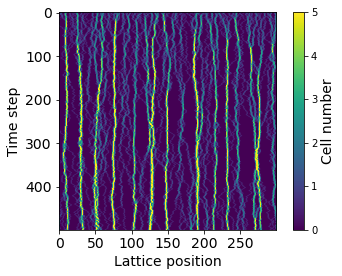

In [19]:
# main loop (single jump)
for t in range(tmax):
    kymog[:,t]=np.sum(lold,1)
    reorients=np.random.uniform(size=int(ncells))
    cellno=0
    for j in range(sze):
        nr=int(np.sum(lold[j,:]))
        leftcs=0
        rightcs=0
        if nr>0:
            nright=np.sum(lold[(j+1)%sze,:])
            nleft=np.sum(lold[(j-1)%sze,:])
            nright=nright*(1-nright/acc)
            nleft=nleft*(1-nleft/acc)
            pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft)))
            for k in range(nr):
                if reorients[cellno]<pright:
                    rightcs+=1
                    cellno+=1
                else:
                    leftcs+=1
                    cellno+=1
        lnew[(j+1)%sze,0]+=rightcs
        lnew[(j-1)%sze,1]+=leftcs
    lold=np.copy(lnew)
    lnew=np.zeros((sze,2))
    
fig, ax = plt.subplots()
pone=ax.imshow(np.transpose(kymog),aspect=0.6)
pone.set_clim(0,5)
cbone=fig.colorbar(pone)
cbone.set_label(label='Cell number',fontsize=14)
plt.xlabel('Lattice position',fontsize=14)
plt.ylabel('Time step',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Block migration

In [20]:
# arrays
lold=np.zeros((sze,2))
lnew=np.zeros((sze,2))
kymog=np.zeros((sze,tmax))

In [21]:
# initial conditions
places=np.random.uniform(size=(sze,2))
for j in range(sze):
    for k in range(2):
        if places[j,k]<pini:
            lold[j,k]=1

In [22]:
# number of cells
ncells=np.sum(lold)

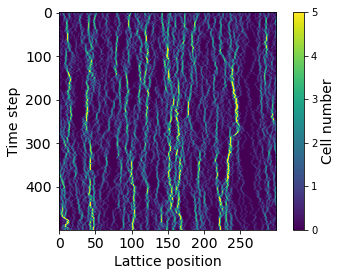

In [23]:
# main loop (block migration)
for t in range(tmax):
    kymog[:,t]=np.sum(lold,1)
    reorients=np.random.uniform(size=int(ncells))
    jumps=sts.zipf.rvs(s,size=(sze,2))
    cellno=0
    for j in range(sze):
        nr=int(np.sum(lold[j,:]))
        leftcs=0
        rightcs=0
        if nr>0:
            nright=np.sum(lold[(j+1)%sze,:])
            nleft=np.sum(lold[(j-1)%sze,:])
            nright=nright*(1-nright/acc)
            nleft=nleft*(1-nleft/acc)
            pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft)))
            for k in range(nr):
                if reorients[cellno]<pright:
                    rightcs+=1
                    cellno+=1
                else:
                    leftcs+=1
                    cellno+=1
        lnew[(j+jumps[j,0])%sze,0]+=rightcs
        lnew[(j-jumps[j,1])%sze,1]+=leftcs
    lold=np.copy(lnew)
    lnew=np.zeros((sze,2))
    
fig, ax = plt.subplots()
pone=ax.imshow(np.transpose(kymog),aspect=0.6)
pone.set_clim(0,5)
cbone=fig.colorbar(pone)
cbone.set_label(label='Cell number',fontsize=14)
plt.xlabel('Lattice position',fontsize=14)
plt.ylabel('Time step',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Single cell migration

In [29]:
# arrays
lold=np.zeros((sze,2))
lnew=np.zeros((sze,2))
kymog=np.zeros((sze,tmax))

In [30]:
# initial conditions
places=np.random.uniform(size=(sze,2))
for j in range(sze):
    for k in range(2):
        if places[j,k]<pini:
            lold[j,k]=1

In [31]:
# number of cells
ncells=np.sum(lold)

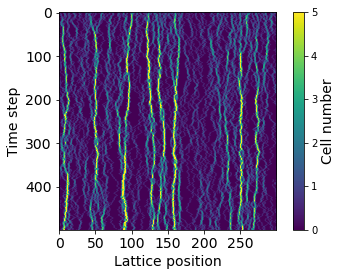

In [32]:
# main loop (block migration)
for t in range(tmax):
    kymog[:,t]=np.sum(lold,1)
    reorients=np.random.uniform(size=int(ncells))
    jumps=sts.zipf.rvs(s,size=int(ncells))
    cellno=0
    for j in range(sze):
        nr=int(np.sum(lold[j,:]))
        leftcs=0
        rightcs=0
        if nr>0:
            nright=np.sum(lold[(j+1)%sze,:])
            nleft=np.sum(lold[(j-1)%sze,:])
            nright=nright*(1-nright/acc)
            nleft=nleft*(1-nleft/acc)
            pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft)))
            for k in range(nr):
                if reorients[cellno]<pright:
                    lnew[(j+jumps[cellno])%sze,0]+=1
                    cellno+=1
                else:
                    lnew[(j-jumps[cellno])%sze,1]+=1
                    cellno+=1
    lold=np.copy(lnew)
    lnew=np.zeros((sze,2))
    
fig, ax = plt.subplots()
pone=ax.imshow(np.transpose(kymog),aspect=0.6)
pone.set_clim(0,5)
cbone=fig.colorbar(pone)
cbone.set_label(label='Cell number',fontsize=14)
plt.xlabel('Lattice position',fontsize=14)
plt.ylabel('Time step',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Two dimensional block migration model

In [34]:
# arrays
lold=np.zeros((sze,sze,4))
lnew=np.zeros((sze,sze,4))
vmatrix=np.zeros((sze,sze))

In [35]:
# initial conditions
places=np.random.uniform(size=(sze,sze,4))
for j in range(sze):
    for m in range(sze):
        for k in range(4):
            if places[j,m,k]<pini:
                lold[j,m,k]=1

In [36]:
# number of cells
ncells=np.sum(lold)

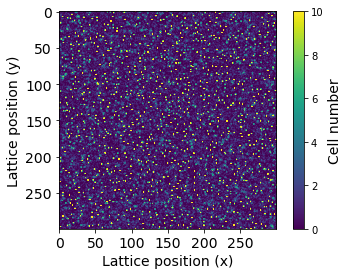

In [37]:
# main loop (block migration)
for t in range(tmax):
#     kymog[:,t]=np.sum(lold,1)
    reorients=np.random.uniform(size=int(ncells))
    jumps=sts.zipf.rvs(s,size=(sze,sze,4))
    cellno=0
    for j in range(sze):
        for m in range(sze):
            nr=int(np.sum(lold[j,m,:]))
            leftcs=0
            rightcs=0
            upcs=0
            downcs=0
            if nr>0:
                nright=np.sum(lold[(j+1)%sze,m,:])
                nleft=np.sum(lold[(j-1)%sze,m,:])
                nup=np.sum(lold[j,(m+1)%sze,:])
                ndown=np.sum(lold[j,(m-1)%sze,:])
                pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft))+2*np.cosh(sens*(nup-ndown)))
                pleft=np.exp(sens*(nleft-nright))/(2*np.cosh(sens*(nright-nleft))+2*np.cosh(sens*(nup-ndown)))
                pup=np.exp(sens*(nup-ndown))/(2*np.cosh(sens*(nright-nleft))+2*np.cosh(sens*(nup-ndown)))
                for k in range(nr):
                    if reorients[cellno]<pright:
                        rightcs+=1
                        cellno+=1
                    elif reorients[cellno]<pright+pleft:
                        leftcs+=1
                        cellno+=1
                    elif reorients[cellno]<pright+pleft+pup:
                        upcs+=1
                        cellno+=1
                    else:
                        downcs+=1
                        cellno+=1
            lnew[(j+jumps[j,m,0])%sze,m,0]+=rightcs
            lnew[(j-jumps[j,m,1])%sze,m,1]+=leftcs
            lnew[j,(m+jumps[j,m,2])%sze,2]+=upcs
            lnew[j,(m-jumps[j,m,3])%sze,3]+=downcs
    lold=np.copy(lnew)
    lnew=np.zeros((sze,sze,4))
        
for j in range(sze):
    for m in range(sze):
        vmatrix[j,m]=np.sum(lold[j,m,:])
    
fig, ax = plt.subplots()
pone=ax.imshow(np.transpose(vmatrix),aspect=1)
pone.set_clim(0,10)
cbone=fig.colorbar(pone)
cbone.set_label(label='Cell number',fontsize=14)
plt.xlabel('Lattice position (x)',fontsize=14)
plt.ylabel('Lattice position (y)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Two dimensional single cell migration model

In [46]:
# arrays
lold=np.zeros((sze,sze,4))
lnew=np.zeros((sze,sze,4))
vmatrix=np.zeros((sze,sze))

In [47]:
# initial conditions
places=np.random.uniform(size=(sze,sze,4))
for j in range(sze):
    for m in range(sze):
        for k in range(4):
            if places[j,m,k]<pini:
                lold[j,m,k]=1

In [48]:
# number of cells
ncells=np.sum(lold)

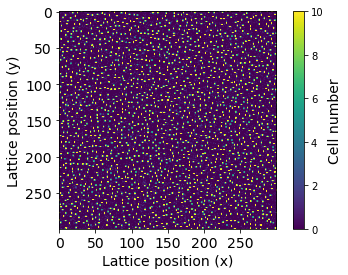

In [49]:
# main loop (block migration)
for t in range(tmax):
#     kymog[:,t]=np.sum(lold,1)
    reorients=np.random.uniform(size=int(ncells))
    jumps=sts.zipf.rvs(s,size=int(ncells))
    cellno=0
    for j in range(sze):
        for m in range(sze):
            nr=int(np.sum(lold[j,m,:]))
            leftcs=0
            rightcs=0
            upcs=0
            downcs=0
            if nr>0:
                nright=np.sum(lold[(j+1)%sze,m,:])
                nleft=np.sum(lold[(j-1)%sze,m,:])
                nup=np.sum(lold[j,(m+1)%sze,:])
                ndown=np.sum(lold[j,(m-1)%sze,:])
                pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft))+2*np.cosh(sens*(nup-ndown)))
                pleft=np.exp(sens*(nleft-nright))/(2*np.cosh(sens*(nright-nleft))+2*np.cosh(sens*(nup-ndown)))
                pup=np.exp(sens*(nup-ndown))/(2*np.cosh(sens*(nright-nleft))+2*np.cosh(sens*(nup-ndown)))
                for k in range(nr):
                    if reorients[cellno]<pright:
                        lnew[(j+jumps[cellno])%sze,m,0]+=1
                        cellno+=1
                    elif reorients[cellno]<pright+pleft:
                        lnew[(j-jumps[cellno])%sze,m,1]+=1
                        cellno+=1
                    elif reorients[cellno]<pright+pleft+pup:
                        lnew[j,(m+jumps[cellno])%sze,2]+=1
                        cellno+=1
                    else:
                        lnew[j,(m-jumps[cellno])%sze,3]+=1
                        cellno+=1
    lold=np.copy(lnew)
    lnew=np.zeros((sze,sze,4))
        
for j in range(sze):
    for m in range(sze):
        vmatrix[j,m]=np.sum(lold[j,m,:])
    
fig, ax = plt.subplots()
pone=ax.imshow(np.transpose(vmatrix),aspect=1)
pone.set_clim(0,10)
cbone=fig.colorbar(pone)
cbone.set_label(label='Cell number',fontsize=14)
plt.xlabel('Lattice position (x)',fontsize=14)
plt.ylabel('Lattice position (y)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()